## Intro

There are a couple comments from the reviewers that I want to clear up in this notebook:

1. How sensitive are the RF results to different parameter values such as number of trees? (from reviewer 1)
2. Why not just use rainfall as a proxy for flood severity? Why go to all the work of building these more complex model if most of the information just comes from the rainfall?
3. Not what the reviewers asked for but for my own peace of mind, are the two models being tested on the same data?

In [1]:
%matplotlib inline

from hr_db_scripts.main_db_script import get_db_table_as_df
from db_scripts.main_db_script import db_filename
from results import make_results_df
import pandas as pd

In [2]:
def get_tables(table_suffix):


    rf_trn_tbl = 'rf{}train'.format(table_suffix)
    rf_tst_tbl = 'rf{}test'.format(table_suffix)
    ps_trn_tbl = 'poisson{}train'.format(table_suffix)
    ps_tst_tbl = 'poisson{}test'.format(table_suffix)

    rf_trn = get_db_table_as_df(rf_trn_tbl, dbfilename=db_filename)
    rf_tst = get_db_table_as_df(rf_tst_tbl, dbfilename=db_filename)
    ps_trn = get_db_table_as_df(ps_trn_tbl, dbfilename=db_filename)
    ps_tst = get_db_table_as_df(ps_tst_tbl, dbfilename=db_filename)
    return {'rf_trn': rf_trn, 'rf_tst': rf_tst, 'ps_trn': ps_trn, 'ps_tst': ps_tst}

### Question 3: are the models being tested on the same data?

In [3]:
suffix = '_revisions_'
tables = get_tables(suffix)

In [4]:
(tables['rf_trn']['all_trn'] != tables['ps_trn']['all_trn']).sum()

2541

In [5]:
(tables['rf_tst']['all_tst'] != tables['ps_tst']['all_tst']).sum()

1255

It looks like they weren't the same... Now we need to see how that affects the results

### Now the code has been refactored so they are the same

In [6]:
suffix = '_revisions1_'
tables1 = get_tables(suffix)

In [7]:
(tables1['rf_trn']['all_trn'] != tables1['ps_trn']['all_trn']).sum()

0

In [8]:
(tables1['rf_tst']['all_tst'] != tables1['ps_tst']['all_tst']).sum()

0

### Question: do the results differ with the restructuring of the code?

In [9]:
(tables1['rf_trn']['all_trn'] != tables['rf_trn']['all_trn']).sum()

0

In [10]:
(tables1['rf_trn']['all_pred_trn'] != tables['rf_trn']['all_pred_trn']).sum()

0

In [11]:
(tables1['rf_tst']['all_tst'] != tables['rf_tst']['all_tst']).sum()

0

In [12]:
(tables1['ps_trn']['all_trn'] != tables['ps_trn']['all_trn']).sum()

2541

In [13]:
(tables1['ps_tst']['all_tst'] != tables['ps_tst']['all_tst']).sum()

1255

So now they are all the same

### Question #1 sensitivity to number of trees

In [14]:
trees = [2, 5, 10, 17, 25, 35, 50, 100, 250, 350, 500, 650, 750, 1000, 2000]

In [15]:
tables = {}

In [16]:
for t in trees:
    tables[t] = 'rf_{}'.format(t)
tables[500] = 'revisions1'

In [17]:
dfs = []
for t in tables:
    df = make_results_df(models=['rf'], suffix=tables[t])
    df.index = [t]
    dfs.append(df)
df_comb = pd.concat(dfs)

rf train rf_rf_2_train
rf test rf_rf_2_test
rf train rf_rf_35_train
rf test rf_rf_35_test
rf train rf_rf_100_train
rf test rf_rf_100_test
rf train rf_rf_5_train
rf test rf_rf_5_test
rf train rf_rf_1000_train
rf test rf_rf_1000_test
rf train rf_rf_10_train
rf test rf_rf_10_test
rf train rf_rf_750_train
rf test rf_rf_750_test
rf train rf_rf_2000_train
rf test rf_rf_2000_test
rf train rf_rf_17_train
rf test rf_rf_17_test
rf train rf_rf_50_train
rf test rf_rf_50_test
rf train rf_revisions1_train
rf test rf_revisions1_test
rf train rf_rf_25_train
rf test rf_rf_25_test
rf train rf_rf_250_train
rf test rf_rf_250_test
rf train rf_rf_650_train
rf test rf_rf_650_test
rf train rf_rf_350_train
rf test rf_rf_350_test


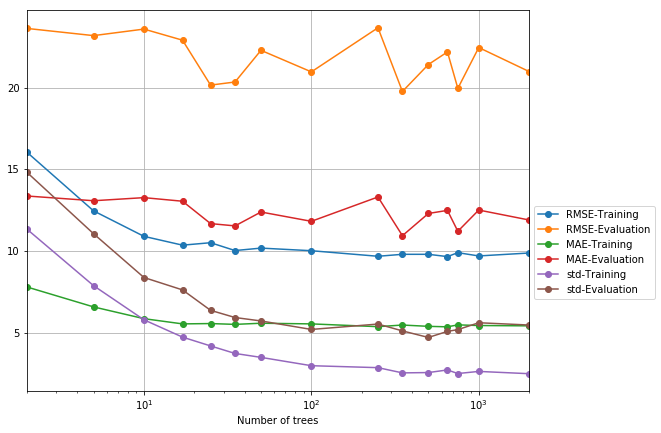

In [18]:
df_comb.sort_index(inplace=True)
ax = df_comb.plot(style="o-", figsize = (9,7), logx=True, grid=True)
ax.legend(bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Number of trees')


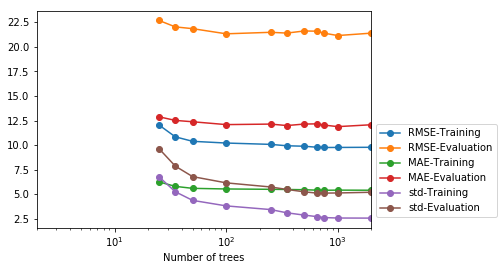

In [19]:
ax = df_comb.rolling(5).mean().plot(style='o-', logx=True)
ax.legend(bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Number of trees')

### Question #2 what if only rainfall

In [81]:
suffixes = ['revisions1', 'only_rd', 'only_rain', 'no_rd', 'no_tides', 'top_5', 'top_2', 'revisions2', 'revisions2_no_tide']

In [82]:
dfs = []
for s in suffixes:
    df = make_results_df(suffix=s)
    dfs.append(df)
    df.index = ["{}_{}".format(i, s) for i in df.index]
df_vars = pd.concat(dfs)

    

poisson train poisson_revisions1_train
poisson test poisson_revisions1_test
rf train rf_revisions1_train
rf test rf_revisions1_test
poisson train poisson_only_rd_train
poisson test poisson_only_rd_test
rf train rf_only_rd_train
rf test rf_only_rd_test
poisson train poisson_only_rain_train
poisson test poisson_only_rain_test
rf train rf_only_rain_train
rf test rf_only_rain_test
poisson train poisson_no_rd_train
poisson test poisson_no_rd_test
rf train rf_no_rd_train
rf test rf_no_rd_test
poisson train poisson_no_tides_train
poisson test poisson_no_tides_test
rf train rf_no_tides_train
rf test rf_no_tides_test
poisson train poisson_top_5_train
poisson test poisson_top_5_test
rf train rf_top_5_train
rf test rf_top_5_test
poisson train poisson_top_2_train
poisson test poisson_top_2_test
rf train rf_top_2_train
rf test rf_top_2_test
poisson train poisson_revisions2_train
poisson test poisson_revisions2_test
rf train rf_revisions2_train
rf test rf_revisions2_test
poisson train poisson_revisi

In [83]:
df_vars

,RMSE-Training,RMSE-Evaluation,MAE-Training,MAE-Evaluation,std-Training,std-Evaluation
poisson_revisions1,9.95,29.36,6.36,15.90,5.26,17.66
rf_revisions1,9.79,21.41,5.38,12.29,2.55,4.70
poisson_only_rd,32.06,30.48,17.14,16.10,4.35,3.48
rf_only_rd,9.36,17.82,5.60,10.73,2.99,6.02
poisson_only_rain,29.00,32.01,14.19,15.61,7.65,7.86
rf_only_rain,12.21,26.83,6.72,14.09,2.37,4.62
poisson_no_rd,9.97,30.08,6.52,15.98,5.23,18.38
rf_no_rd,12.94,27.77,6.95,14.86,3.03,5.67
poisson_no_tides,12.55,37.14,8.17,18.93,6.63,12.81
rf_no_tides,10.85,24.95,5.91,13.84,2.60,4.81


In [23]:
(21.41-17.82)/21.41

0.16767865483418962

In [24]:
(21.41-20.49)/21.41

0.042970574497898255

In [25]:
(24.95-21.41)/21.41

0.1653432975245212

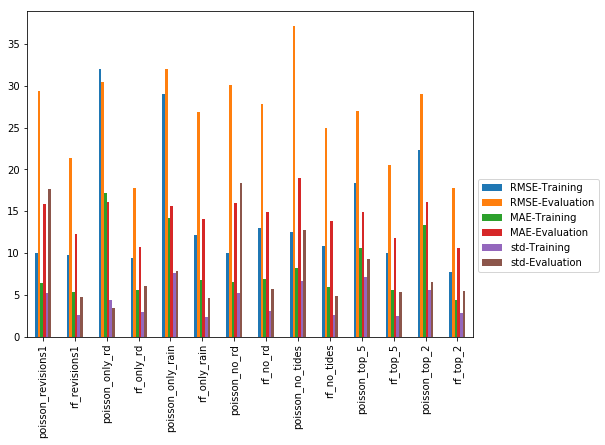

In [26]:
ax = df_vars.plot.bar(figsize=(8,6))
ax.legend(bbox_to_anchor=(1, 0.5))

### Sensitivity to number of variables

In [43]:
suffixes = [4, 6, 8, 10, 12, 14, 16, 18, 20]
suffixes = ['rf_{}v'.format(i) for i in suffixes]

In [44]:
dfs = []
for s in suffixes:
    df = make_results_df(suffix=s, models=['rf'])
    dfs.append(df)
    df.index = ["{}_{}".format(i, s) for i in df.index]
df_nvars = pd.concat(dfs)

    

rf train rf_rf_4v_train
rf test rf_rf_4v_test
rf train rf_rf_6v_train
rf test rf_rf_6v_test
rf train rf_rf_8v_train
rf test rf_rf_8v_test
rf train rf_rf_10v_train
rf test rf_rf_10v_test
rf train rf_rf_12v_train
rf test rf_rf_12v_test
rf train rf_rf_14v_train
rf test rf_rf_14v_test
rf train rf_rf_16v_train
rf test rf_rf_16v_test
rf train rf_rf_18v_train
rf test rf_rf_18v_test
rf train rf_rf_20v_train
rf test rf_rf_20v_test


In [45]:
df_nvars

,RMSE-Training,RMSE-Evaluation,MAE-Training,MAE-Evaluation,std-Training,std-Evaluation
rf_rf_4v,10.23,22.36,5.60,12.37,2.50,5.13
rf_rf_6v,9.41,20.22,5.18,11.70,2.62,5.10
rf_rf_8v,8.75,19.06,4.85,11.25,2.61,5.34
rf_rf_10v,8.29,17.66,4.63,10.69,2.62,4.66
rf_rf_12v,7.89,18.78,4.39,11.20,2.82,5.63
rf_rf_14v,7.78,17.97,4.22,10.66,2.84,6.50
rf_rf_16v,7.76,15.73,4.32,9.46,2.79,6.50
rf_rf_18v,7.74,16.81,4.30,9.95,2.97,7.05
rf_rf_20v,7.74,16.81,4.30,9.95,2.97,7.05


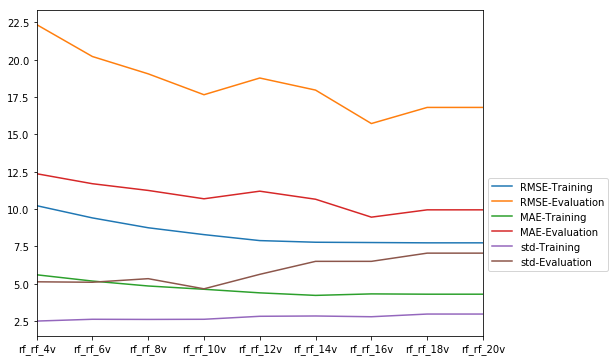

In [46]:
ax = df_nvars.plot(figsize=(8,6))
ax.legend(bbox_to_anchor=(1, 0.5))

In [3]:
df_tune = get_db_table_as_df("tuning_mtry", dbfilename=db_filename)

In [5]:
del df_tune['row_names']

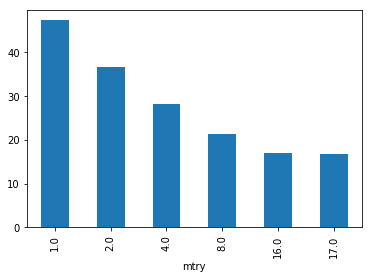

In [36]:
df_tune_piv = df_tune.pivot(columns="mtry", values="OOBError")
df_tune_piv.mean().plot.bar()

In [54]:
j = 0
l = []
m = []
first_time = True
for i in df_tune.iterrows():
    if i[1]['mtry'] == 1 and first_time == False:
        sub_df = pd.DataFrame(m)
        sub_df['num_run'] = j
        sub_df['rank'] = sub_df['OOBError'].rank()
        l.append(sub_df)
        j += 1
        m = []
    first_time = False
    m.append(i[1])

In [68]:
df_tune_counts = pd.concat(l)

In [69]:
df_tune_counts.head()

,mtry,OOBError,num_run,rank
0,1.0,46.183688,0,6.0
1,2.0,34.617008,0,5.0
2,4.0,28.417848,0,4.0
3,8.0,24.093781,0,3.0
4,16.0,22.988226,0,2.0


In [72]:
df_tune_rank_pivot = df_tune_counts.pivot_table(values='rank', columns='num_run', index='mtry')

In [74]:
df_tune_rank_pivot.head(6)

num_run,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
mtry,,,,,,,,,,,,,,,,,,,,,
1.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0
2.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0
8.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,...,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0
16.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
17.0,1.0,NaN,1.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,...,1.0,2.0,2.0,2.0,1.0,NaN,1.0,2.0,2.0,2.0


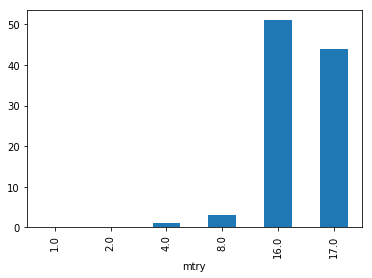

In [80]:
(df_tune_rank_pivot == 1).sum(1).plot.bar()